In [29]:
import numpy as np #numpyにnpという別名を付けてimport
import pandas as pd #pandasにpdという別名を付けてimport
import matplotlib.pyplot as plt #グラフ描画のためのライブラリmatplotlibをimportする

csv_in ='severe_cases_daily.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1096, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1096 non-null   object
 1   ALL        1096 non-null   int64 
 2   Hokkaido   1096 non-null   int64 
 3   Aomori     1096 non-null   int64 
 4   Iwate      1096 non-null   int64 
 5   Miyagi     1096 non-null   int64 
 6   Akita      1096 non-null   int64 
 7   Yamagata   1096 non-null   int64 
 8   Fukushima  1096 non-null   int64 
 9   Ibaraki    1096 non-null   int64 
 10  Tochigi    1096 non-null   int64 
 11  Gunma      1096 non-null   int64 
 12  Saitama    1096 non-null   int64 
 13  Chiba      1096 non-null   int64 
 14  Tokyo      1096 non-null   int64 
 15  Kanagawa   1096 non-null   int64 
 16  Niigata    1096 non-null   int64 
 17  Toyama     1096 non-null   int64 
 18  Ishikawa   1096 non-null   int64 
 19  Fukui      1096 non-null   int64 
 20  Yamanashi  1096 non

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/5/9,267,23,0,0,0,0,0,0,3,...,2,0,0,1,0,2,0,0,0,5
1,2020/5/10,249,28,0,0,0,0,0,0,3,...,2,0,0,1,0,2,0,0,0,5
2,2020/5/11,243,26,0,0,0,0,0,0,2,...,1,0,0,1,0,2,0,0,0,5
3,2020/5/12,259,24,0,0,0,0,2,0,2,...,0,0,11,0,0,2,0,0,0,4
4,2020/5/13,245,19,0,0,0,0,2,2,2,...,0,0,11,0,0,2,0,0,0,4


In [30]:
df_all=df[['Date','ALL']]
display(df_all)

,Date,ALL
0,2020/5/9,267
1,2020/5/10,249
2,2020/5/11,243
3,2020/5/12,259
4,2020/5/13,245
...,...,...
1091,2023/5/5,73
1092,2023/5/6,74
1093,2023/5/7,74
1094,2023/5/8,80


In [31]:
df_all['Date']=pd.to_datetime(df_all['Date'])
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1096 non-null   datetime64[ns]
 1   ALL     1096 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.2 KB
None


C:\Users\iniad\AppData\Local\Temp\ipykernel_34916\3205579207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Date']=pd.to_datetime(df_all['Date'])


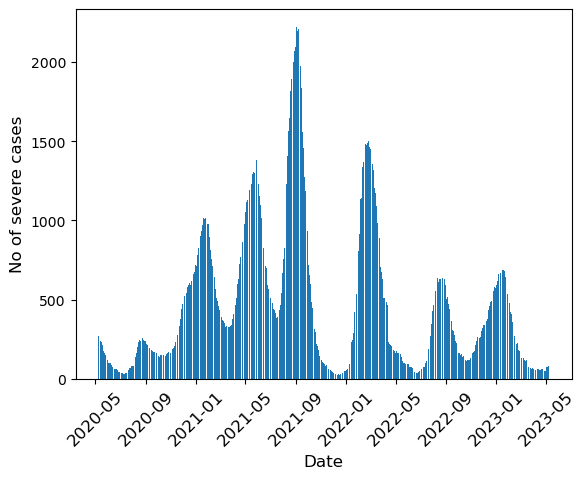

In [32]:
plt.bar(df_all['Date'], df_all['ALL'])
plt.xlabel('Date', size=12)
plt.ylabel('No of severe cases', size=12)
plt.xticks(rotation=45,fontsize=12)
plt.show()


In [33]:
df_all = df_all.set_index('Date')
display(df_all)

,ALL
Date,
2020-05-09,267
2020-05-10,249
2020-05-11,243
2020-05-12,259
2020-05-13,245
...,...
2023-05-05,73
2023-05-06,74
2023-05-07,74


In [34]:
df_all_rolling7=df_all.rolling(7).mean()
display(df_all_rolling7.head())
display(df_all_rolling7.tail())

,ALL
Date,
2020-05-09,NaN
2020-05-10,NaN
2020-05-11,NaN
2020-05-12,NaN
2020-05-13,NaN


,ALL
Date,
2023-05-05,62.000000
2023-05-06,65.571429
2023-05-07,68.857143
2023-05-08,72.428571
2023-05-09,75.142857


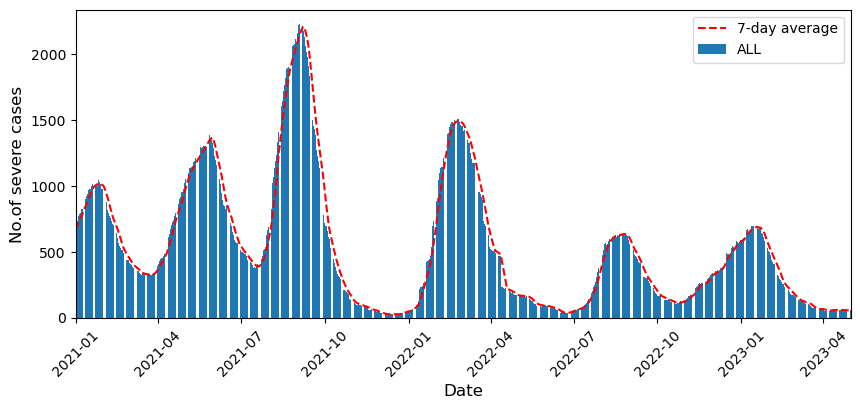

In [35]:
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-05-01')

plt.figure(figsize=(10,4))
plt.bar(df_all.index,df_all['ALL'],label='ALL')
plt.plot(df_all_rolling7.index, df_all_rolling7['ALL'],'--', label='7-day average',color='red')
plt.xticks(rotation=45)
plt.xlim(start_date,end_date)
plt.xlabel('Date',size=12)
plt.ylabel('No.of severe cases',size=12)
plt.legend()
plt.show()

In [36]:
df_m_sum=df_all.resample('M').sum()
display(df_m_sum.head())

,ALL
Date,
2020-05-31,4417
2020-06-30,2185
2020-07-31,1538
2020-08-31,6188
2020-09-30,5536


In [37]:
display(df_m_sum[df_m_sum['ALL']>30000])

,ALL
Date,
2021-05-31,38329
2021-08-31,48505
2021-09-30,49880
2022-02-28,37415
2022-03-31,32538


In [38]:
df_all['day_of_week'] = df_all.index.dayofweek
display(df_all.head())

,ALL,day_of_week
Date,,
2020-05-09,267,5
2020-05-10,249,6
2020-05-11,243,0
2020-05-12,259,1
2020-05-13,245,2


In [39]:
df_all_2022=df_all['2022']

C:\Users\iniad\AppData\Local\Temp\ipykernel_34916\3678676003.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_all_2022=df_all['2022']


In [40]:
display(df_all_2022)

,ALL,day_of_week
Date,,
2022-01-01,53,5
2022-01-02,52,6
2022-01-03,54,0
2022-01-04,60,1
2022-01-05,64,2
...,...,...
2022-12-27,582,1
2022-12-28,577,2
2022-12-29,565,3


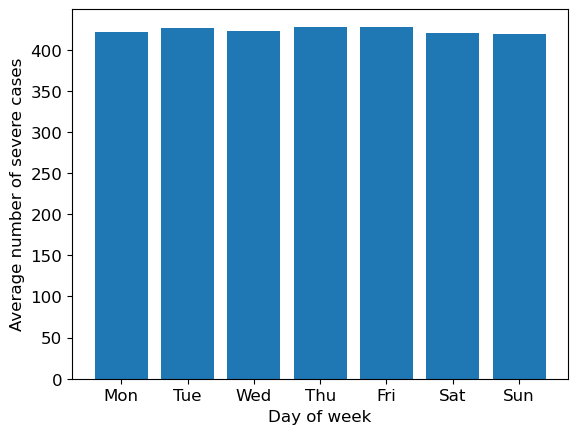

In [60]:
df3 = df_all_2022.groupby('day_of_week').mean()
wday_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(wday_list, df3['ALL'])
plt.xlabel('Day of week',size=12)
plt.ylabel('Average number of severe cases',size=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()